In [3]:
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans

In [4]:
data = datasets.load_iris()

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
X = pd.DataFrame(data.data, columns=data.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y = pd.Series(data.target) # the Iris class
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [9]:
mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [10]:
y = y.map(mapping)
y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

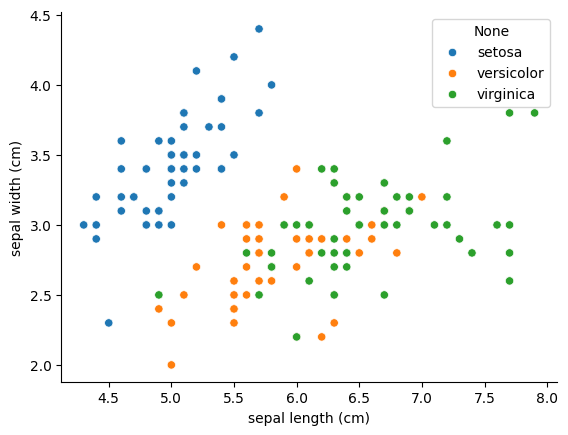

In [11]:
sns.scatterplot(data=X, x='sepal length (cm)', y='sepal width (cm)', hue=y)
sns.despine()

In [12]:
X_train = X[['sepal length (cm)', 'sepal width (cm)']]

In [13]:
kmeans = KMeans(n_clusters = 3, random_state = 14)

In [14]:
kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=14)

In [16]:
kmeans.n_iter_ # How many iterations to "converge"?

5

In [17]:
kmeans.cluster_centers_ # location in 2D space of centroids, let's plot them with the data!

array([[6.82391304, 3.07826087],
       [5.00392157, 3.40980392],
       [5.8       , 2.7       ]])

In [20]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = ['sepal length (cm)', 'sepal width (cm)'])
centroids

,sepal length (cm),sepal width (cm)
0,6.823913,3.078261
1,5.003922,3.409804
2,5.800000,2.700000


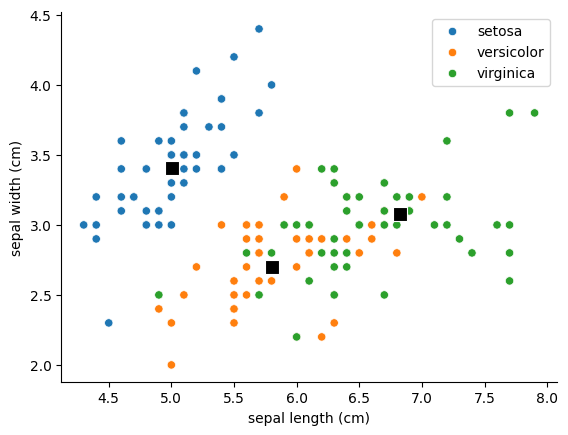

In [37]:
sns.scatterplot(data=X, x='sepal length (cm)', y='sepal width (cm)', hue=y)
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = centroids, color = 'black', marker='s', s=100),
sns.despine()